In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

In [2]:
skills_df = pd.read_csv('../data/skills_only_data.csv')
skills_job_df = pd.read_csv('../data/skills_with_jobtitle_data.csv')

/Users/anshikabajpai/Desktop/data_mining/CareerPathGuidanceTool/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


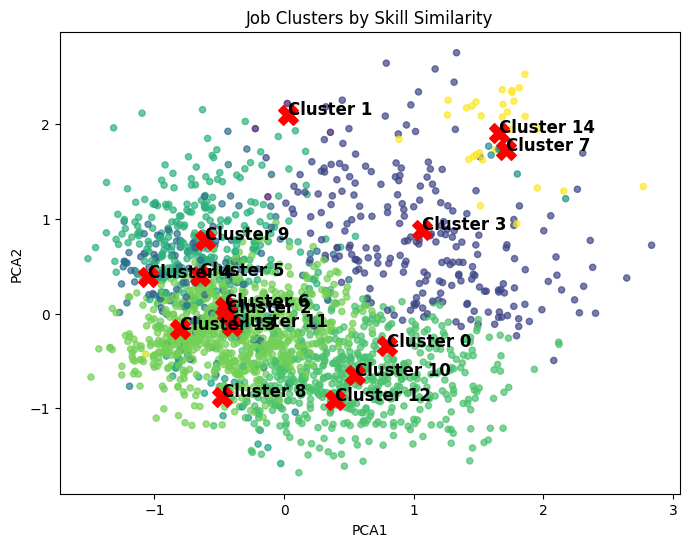

In [3]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

k = 15
from sklearn.cluster import MiniBatchKMeans

kmeans_batch = MiniBatchKMeans(n_clusters=k, random_state=42, batch_size=100)
result_batch = kmeans_batch.fit_predict(skills_df)

pca = PCA(n_components=2)
reduced = pca.fit_transform(skills_df)

plt.figure(figsize=(8,6))
plt.scatter(reduced[:,0], reduced[:,1], c=result_batch, cmap='viridis', s=20, alpha=0.7)

# Plot centroids
centroids_2d = pca.transform(kmeans_batch.cluster_centers_)
plt.scatter(centroids_2d[:,0], centroids_2d[:,1],
            s=200, c='red', marker='X')

# Add cluster labels
for i, (x, y) in enumerate(centroids_2d):
    plt.text(x, y, f"Cluster {i}", fontsize=12, fontweight='bold')

plt.title('Job Clusters by Skill Similarity')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()

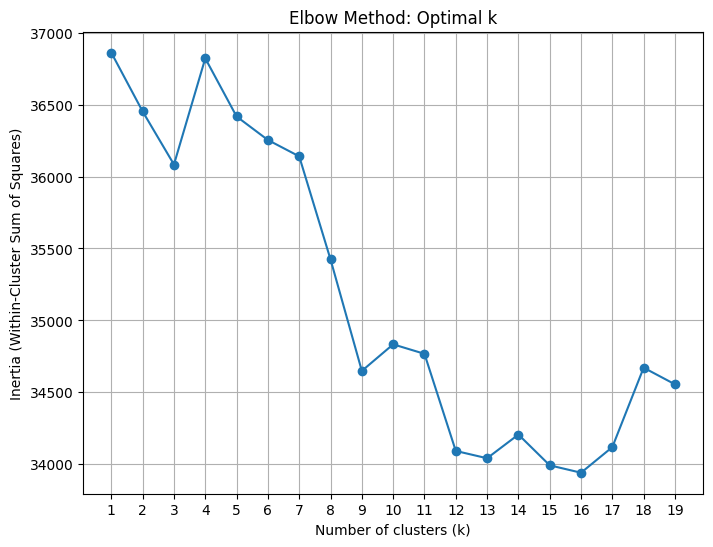

In [4]:
from sklearn.cluster import MiniBatchKMeans
import matplotlib.pyplot as plt

inertia_values = []
k_values = range(1, 20)   # test k from 1 to 15

for k in k_values:

    kmeans_temp_batch = MiniBatchKMeans(n_clusters=k, random_state=42, batch_size=100)
    kmeans_temp_batch.fit(skills_df)
    inertia_values.append(kmeans_temp_batch.inertia_)

plt.figure(figsize=(8,6))
plt.plot(k_values, inertia_values, marker='o')
plt.title('Elbow Method: Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia (Within-Cluster Sum of Squares)')
plt.xticks(k_values)
plt.grid(True)
plt.show()


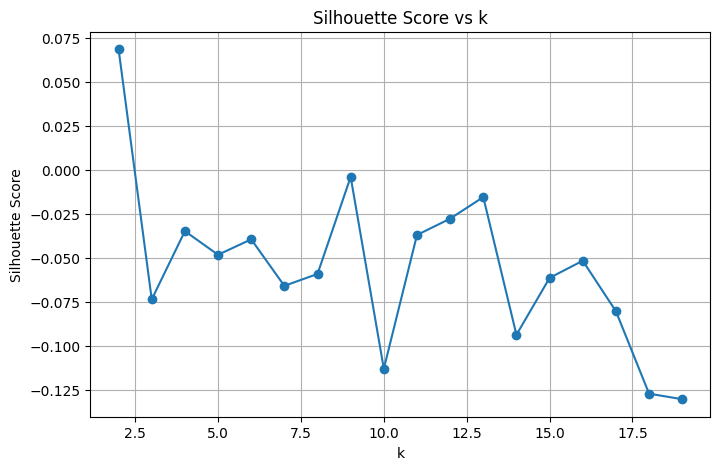

In [5]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import MiniBatchKMeans

silhouette_scores = []
k_values = range(2, 20)

for k in k_values:

    kmeans_temp_batch = MiniBatchKMeans(n_clusters=k, random_state=42, batch_size=100)
    labels = kmeans_temp_batch.fit_predict(skills_df)
    score = silhouette_score(skills_df, labels)
    silhouette_scores.append(score)

plt.figure(figsize=(8,5))
plt.plot(k_values, silhouette_scores, marker='o')
plt.title("Silhouette Score vs k")
plt.xlabel("k")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()


/Users/anshikabajpai/Desktop/data_mining/CareerPathGuidanceTool/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


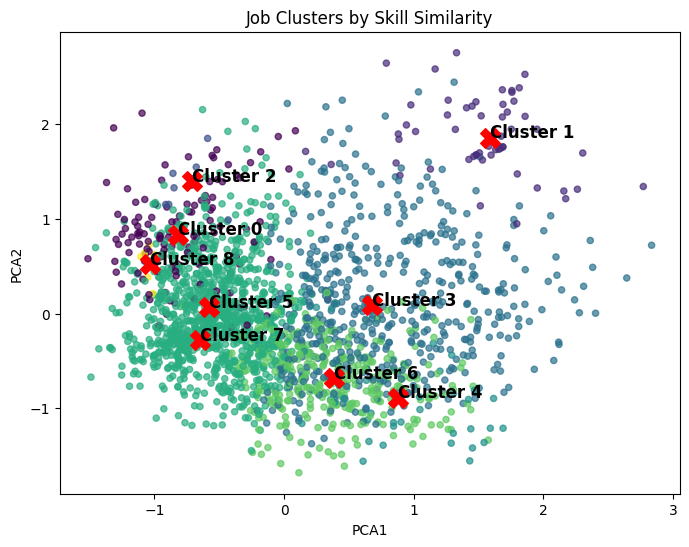

In [6]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

k = 9
from sklearn.cluster import MiniBatchKMeans

kmeans_batch = MiniBatchKMeans(n_clusters=k, random_state=42, batch_size=100)
result_batch = kmeans_batch.fit_predict(skills_df)

pca = PCA(n_components=2)
reduced = pca.fit_transform(skills_df)

plt.figure(figsize=(8,6))
plt.scatter(reduced[:,0], reduced[:,1], c=result_batch, cmap='viridis', s=20, alpha=0.7)

# Plot centroids
centroids_2d = pca.transform(kmeans_batch.cluster_centers_)
plt.scatter(centroids_2d[:,0], centroids_2d[:,1],
            s=200, c='red', marker='X')

# Add cluster labels
for i, (x, y) in enumerate(centroids_2d):
    plt.text(x, y, f"Cluster {i}", fontsize=12, fontweight='bold')

plt.title('Job Clusters by Skill Similarity')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()

/Users/anshikabajpai/Desktop/data_mining/CareerPathGuidanceTool/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


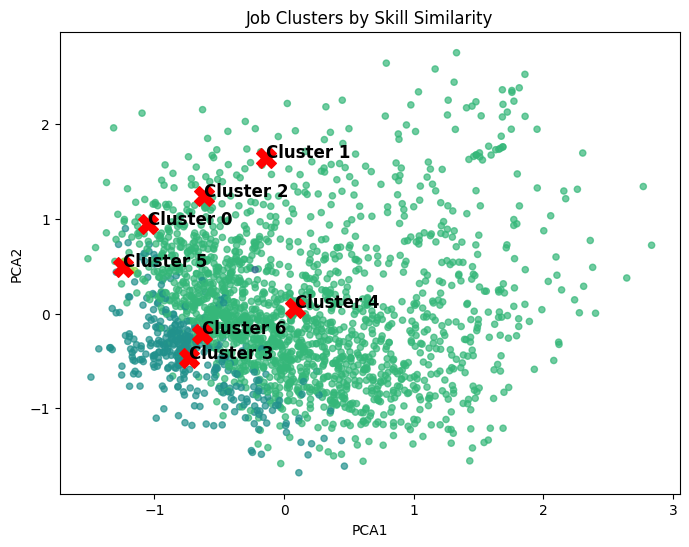

In [7]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

k = 7
from sklearn.cluster import MiniBatchKMeans

kmeans_batch = MiniBatchKMeans(n_clusters=k, random_state=42, batch_size=100)
result_batch = kmeans_batch.fit_predict(skills_df)

pca = PCA(n_components=2)
reduced = pca.fit_transform(skills_df)

plt.figure(figsize=(8,6))
plt.scatter(reduced[:,0], reduced[:,1], c=result_batch, cmap='viridis', s=20, alpha=0.7)

# Plot centroids
centroids_2d = pca.transform(kmeans_batch.cluster_centers_)
plt.scatter(centroids_2d[:,0], centroids_2d[:,1],
            s=200, c='red', marker='X')

# Add cluster labels
for i, (x, y) in enumerate(centroids_2d):
    plt.text(x, y, f"Cluster {i}", fontsize=12, fontweight='bold')

plt.title('Job Clusters by Skill Similarity')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()

In [8]:
skills_job_df['cluster_batch_kmeans']=result_batch

In [9]:
import numpy as np
import pandas as pd

skill_cols = skills_df.columns  # list of all skill names

cluster_skill_summary_batch_kmeans = {}

for c in range(k):

    # rows belonging to this cluster
    cluster_indices = skills_job_df[skills_job_df['cluster_batch_kmeans'] == c].index

    if len(cluster_indices) == 0:
        print(f"\n===== Cluster {c} — EMPTY CLUSTER =====")
        cluster_skill_summary_batch_kmeans[c] = None
        continue

    # extract the rows from skills_df
    cluster_matrix = skills_df.iloc[cluster_indices]

    # convert sparse columns to dense float to avoid locked 0/1 behavior
    # cluster_matrix_dense = cluster_matrix.sparse.to_dense().astype(float)
    cluster_matrix_dense = cluster_matrix.astype(float)

    # compute mean frequency of each skill
    skill_means = cluster_matrix_dense.mean(axis=0).sort_values(ascending=False)

    cluster_skill_summary_batch_kmeans[c] = skill_means

    print(f"\n===== Cluster {c} — Top Skills =====")
    print(skill_means.head(10))




===== Cluster 0 — Top Skills =====
kubernetes             1.0
linux                  1.0
disaster recovery      1.0
distributed systems    1.0
python                 1.0
client relations       1.0
git                    1.0
c++                    1.0
jenkins                1.0
golang                 1.0
dtype: float64

===== Cluster 1 — Top Skills =====
elasticsearch      1.0
nosql              1.0
data structures    1.0
mlflow             1.0
kibana             1.0
algorithms         1.0
sagemaker          1.0
s3                 1.0
hadoop             1.0
lambda             1.0
dtype: float64

===== Cluster 2 — Top Skills =====
computational chemistry    1.0
tensorflow                 1.0
machine learning           1.0
materials science          1.0
c++                        1.0
sustainability             1.0
fortran                    1.0
python                     1.0
git                        1.0
computational modeling     1.0
dtype: float64

===== Cluster 3 — Top Skills =====
n

In [10]:
for c in range(k):
    print(f"\n===== Cluster {c} — Top Job Roles =====")
    print(skills_job_df[skills_job_df['cluster_batch_kmeans'] == c]['job_title'].value_counts().head(5))



===== Cluster 0 — Top Job Roles =====
job_title
Software Engineer 1 / Early Career    1
Name: count, dtype: int64

===== Cluster 1 — Top Job Roles =====
job_title
Data Scientist    1
Name: count, dtype: int64

===== Cluster 2 — Top Job Roles =====
job_title
Data Scientist                                    1
Scientific Software Developer (Thermodynamics)    1
Name: count, dtype: int64

===== Cluster 3 — Top Job Roles =====
job_title
Network Engineer          53
Cyber Security Analyst    12
Systems Administrator      8
Systems Engineer           8
IT Support Engineer        7
Name: count, dtype: int64

===== Cluster 4 — Top Job Roles =====
job_title
Business Analyst     111
Software Engineer     85
Data Analyst          56
Data Engineer         25
Data Scientist        22
Name: count, dtype: int64

===== Cluster 5 — Top Job Roles =====
job_title
Systems Engineer    7
Name: count, dtype: int64

===== Cluster 6 — Top Job Roles =====
job_title
Network Engineer    1
Name: count, dtype: int

In [11]:
import sys
import os

sys.path.append(os.path.abspath(".."))

import constants

Loaded keys: 12508
{'udeploy': 'devops and deployment', 'av/vc': 'video conferencing', 'thinks holistically': 'soft skills', 'checkpoint firewall management': 'checkpoint firewall', 'management plans': 'project management', 'sops': 'standard operating procedures', 'microsoft graph': 'microsoft apis', 'software asset management': 'software development', 'business terminology': 'business unit', 'data sets': 'datasets', 'retail operations': 'retail', 'step definitions': 'software testing', 'elisa/msd': 'immunoassays', 'sae j3061': 'automotive standards and security', 'react with redux': 'web development', 'platform as a service': 'paas', 'source control': 'version control', 'esra': 'risk management', 'disaster recovery solutions': 'disaster recovery', 'reporting projects': 'reporting', 'industrial automation engineering tools': 'industrial automation', 'medicine': 'healthcare', 'i/o technologies': 'input/output systems', 'sales process management': 'sales', 'r (programming language)': 'r'

In [12]:

import re
import sys
import os

sys.path.append(os.path.abspath(".."))
from src.utils import split_normalize_and_canonicalize


In [13]:
def get_centroids_kmeans(skills_df, skills_job_df, algo_col_name):
    cluster_centroids = {}

    for c in range(k):
        idx = skills_job_df[skills_job_df[algo_col_name] == c].index

        if len(idx) == 0:
            continue

        # Convert sparse to dense before mean
        centroid = (
            skills_df.iloc[idx]
            # .sparse.to_dense()
            .astype(float)
            .mean(axis=0)
            .values   # ✅ convert to NumPy array
        )

        cluster_centroids[c] = centroid

    return cluster_centroids

centroids = get_centroids_kmeans(skills_df, skills_job_df, "cluster_batch_kmeans")

In [14]:
def get_user_vector(skills,skills_df):
    user_skills=split_normalize_and_canonicalize(skills)
    print("User Skills:", user_skills)
    skill_cols = skills_df.columns.tolist()
    
    user_vector = pd.Series(0, index=skill_cols)
    for skill in user_skills:
        if skill in user_vector.index:
            # print(skill)
            user_vector[skill] = 1

    return user_vector, user_skills, skill_cols

In [15]:
from sklearn.metrics.pairwise import cosine_similarity

def get_closest_cluster(user_vector, algo_col_name, cluster_skill_summary, cluster_centroids):

    # print(skills_job_df[algo_col_name].unique())
    similarities = {}

    for c, centroid in cluster_centroids.items():
        centroid_vec = centroid.reshape(1, -1)   # ✅ NOW this works
        sim = cosine_similarity(user_vector.values.astype(float).reshape(1, -1), centroid_vec)[0][0]
        similarities[c] = sim

    best_cluster = max(similarities, key=similarities.get)

    return best_cluster, similarities




In [16]:

def recommend_missing_skills_from_cluster(skills, all_skills,cluster_skill_summary, cluster_id, top_n=5):

    skill_means = cluster_skill_summary[cluster_id]

    if skill_means is None:
        print("⚠️ Empty cluster — no recommendations available.")
        return None

    missing_skills = skill_means[user_vector == 0]

    return missing_skills.head(top_n)


In [17]:
# @title test cases

test_cases = [
    ("Unknown",
      ["tableau"]),

    ("Unknown",
     ["python", "sql", "data analysis"]),

    ("Classic data-analysis stack",
     ["python", "sql", "data analysis"]),

    ("Junior data analyst (Excel-heavy)",
     ["excel", "sql", "data visualization"]),

    ("BI / dashboard person",
     ["tableau", "power bi", "data visualization"]),

    ("Web dev – front end",
     ["html", "css", "javascript"]),

    ("Web dev – full stack JS",
     ["javascript", "node", "react", "sql"]),

    ("DevOps / cloud",
     ["linux", "docker", "kubernetes", "aws"]),

    ("Backend Java engineer",
     ["java", "spring", "sql"]),

    ("Cybersecurity / infosec",
     ["cybersecurity", "network security", "linux"]),

    ("QA / testing",
     ["software testing", "selenium", "automation"]),

    ("Totally random + one real skill",
     ["knitting", "underwater basket weaving", "python"]),
]


In [18]:
for label, user_skills in test_cases:
    print("=" * 80)
    print(label)
    # print("User skills:", user_skills)

    skills=", ".join(user_skills)
    
    user_vector, processed_skills, all_skills=get_user_vector(skills,skills_df)
    # print(user_vector)
    best_cluster, similarities = get_closest_cluster(
        user_vector,
        "cluster_batch_kmeans",
        cluster_skill_summary_batch_kmeans, centroids
    )
    print("✅  Closest Cluster by Similarity:", best_cluster)
    # print("✅ All Similarities:", similarities)

    recommended_skills = recommend_missing_skills_from_cluster(
        processed_skills, all_skills,
        cluster_skill_summary=cluster_skill_summary_batch_kmeans, 
        cluster_id=best_cluster,
        top_n=5
    )

    print("\n✅ Recommended Missing Skills:")
    print(recommended_skills)


Unknown
User Skills: ['tableau']
✅  Closest Cluster by Similarity: 4

✅ Recommended Missing Skills:
communication      0.454030
data analysis      0.342792
problem solving    0.277526
sql                0.272985
python             0.263337
dtype: float64
Unknown
User Skills: ['data analysis', 'python', 'sql']
✅  Closest Cluster by Similarity: 4

✅ Recommended Missing Skills:
communication           0.454030
problem solving         0.277526
project management      0.209421
business unit           0.208286
software development    0.199205
dtype: float64
Classic data-analysis stack
User Skills: ['data analysis', 'python', 'sql']
✅  Closest Cluster by Similarity: 4

✅ Recommended Missing Skills:
communication           0.454030
problem solving         0.277526
project management      0.209421
business unit           0.208286
software development    0.199205
dtype: float64
Junior data analyst (Excel-heavy)
User Skills: ['data visualization', 'microsoft excel', 'sql']
✅  Closest Cluster by S

In [19]:
anshika = "Python, R, SQL, Java, C/C++, PostgreSQL, BigQuery, JavaScript, Jenkins, Git, GCP, DevOps, Docker, Kubernetes, PySpark, Data Visualization, Prometheus, Data Integration, AWS, PyTorch, Natural Language Processing (NLP), Neural Networks, CNN, RNN, LSTM, GRU, FeedForward Networks, Deep Learning, Generative AI, Recommendation System, MLOps, Anomaly Detection, LLMs, Graph Neural Networks, Vertex AI, Prompt Engineering, NumPy, Matplotlib, Pandas, NLTK, Scikit-Learn, OpenCV, Grafana, Snowflake, Streamlit, FastAPI, Keras, TensorFlow"
anshika1 = "Python, SQL, C/C++, PostgreSQL, BigQuery,  Jenkins, Git, GCP,  PySpark, Data Visualization, Prometheus, Data Integration, PyTorch, Natural Language Processing (NLP), Neural Networks, CNN, RNN, LSTM, GRU, FeedForward Networks, Deep Learning, Generative AI, Anomaly Detection, LLMs,  Vertex AI, Prompt Engineering, NumPy, Matplotlib, Pandas, NLTK, Scikit-Learn, OpenCV, Grafana, Snowflake, Streamlit, FastAPI, Keras, TensorFlow"

# Second skill set
friend1 = "Java, C/C++, Python, FastAPI, SQL, PostgreSQL, Flask, Go, React, JavaScript, Typescript, Node.js, Kotlin, SpringBoot, Docker, Kubernetes, JUnit, Git, AWS (S3, DynamoDB), GCP, ServiceNow, Grafana, Cassandra, Object Oriented Programming, System Design, Design Patterns, Microservices, Distributed Systems, CI/CD, Concurrency, Mobile Application Development, Web Application Development, Software Development Life Cycle, Reinforcement Learning, Large Language Model (LLM), RAG, TensorFlow, PyTorch, Keras, NumPy, Pandas, OpenCV, Natural Language Processing, Graph Neural Network, Scikit-Learn, GenAI, Prompt Engineering, Computer Vision"
friend2 = "Java, C/C++, Python, FastAPI, SQL, PostgreSQL, React, JavaScript, Node.js, SpringBoot, Docker, Kubernetes, JUnit, Git, AWS (S3, DynamoDB), ServiceNow, Grafana, Object Oriented Programming, System Design, Design Patterns, Microservices, Distributed Systems, CI/CD, Concurrency, Web Application Development, Software Development Life Cycle, Reinforcement Learning, Large Language Model (LLM), RAG, TensorFlow, PyTorch, NumPy, Pandas, Natural Language Processing, Scikit-Learn, GenAI, Prompt Engineering, Computer Vision"

# Third skill set
friend3 = "Python, SQL, NoSQL, PL/SQL, R, VBA Dashboards, Power BI, Machine Learning, Data Analytics, Predictive Modelling, Visualization, Pandas, NumPy, TensorFlow, Scikit-Learn, Matplotlib, Seaborn, Snowflake, MongoDB, Neo4j"
temp = "R, SQL, Java, Python, Shell/Bash Scripting, PowerShell automation, SIEM: Elastic Stack, SIEM: Microsoft Defender XDR, EDR/XDR: SentinelOne, EDR/XDR: CrowdStrike, IDS/IPS deployment and monitoring, Vulnerability Management, Nessus, OpenVAS, Qualys, Web App Security: OWASP ZAP, Web App Security: Burp Suite, Penetration Testing: Metasploit, Penetration Testing: Nmap, AWS, Azure AD security, Firewalls, VPNs, Wireshark, Network Traffic Analysis: tcpdump, Network Traffic Analysis: Snort"
skills=temp

In [20]:
user_vector, processed_skills, all_skills=get_user_vector(skills,skills_df)
    # print(user_vector)
best_cluster, similarities = get_closest_cluster(
    user_vector,
    "cluster_batch_kmeans",
    cluster_skill_summary_batch_kmeans, centroids
)
print("✅  Closest Cluster by Similarity:", best_cluster)
# print("✅ All Similarities:", similarities)

recommended_skills = recommend_missing_skills_from_cluster(
    processed_skills, all_skills,
    cluster_skill_summary=cluster_skill_summary_batch_kmeans, 
    cluster_id=best_cluster,
    top_n=5
)

print("\n✅ Recommended Missing Skills:")
print(recommended_skills)


User Skills: ['aws', 'azure ad security', 'edr/xdr: crowdstrike', 'edr/xdr: sentinelone', 'firewalls', 'ids/ips deployment and monitoring', 'java', 'network analysis', 'network traffic analysis: snort', 'network traffic analysis: tcpdump', 'openvas', 'penetration testing: metasploit', 'penetration testing: nmap', 'powershell automation', 'python', 'r', 'shell/bash scripting', 'siem: elastic stack', 'siem: microsoft defender xdr', 'sql', 'vpn', 'vulnerability management', 'vulnerability scanner', 'web app security: burp suite', 'web app security: owasp zap']
✅  Closest Cluster by Similarity: 4

✅ Recommended Missing Skills:
communication         0.454030
data analysis         0.342792
problem solving       0.277526
project management    0.209421
business unit         0.208286
dtype: float64


In [21]:
import plotly.express as px
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA

# Job vectors (dense)
# job_matrix_dense = skills_df.sparse.to_dense().astype(float).values
job_matrix_dense = skills_df.astype(float).values


# Centroids + user
centroid_matrix = np.vstack(list(centroids.values()))
vectors_for_pca = np.vstack([job_matrix_dense, centroid_matrix, user_vector])  # JOB first, then CENTROID, then USER

# Labels for hover
labels = skills_job_df["job_title"].tolist() + [f"Cluster {c}" for c in centroids.keys()] + ["USER"]

# Role type for coloring
types = ["JOB"] * job_matrix_dense.shape[0] + ["CENTROID"] * len(centroids) + ["USER"]


In [22]:
pca = PCA(n_components=2)
vectors_2d = pca.fit_transform(vectors_for_pca)

df_plot = pd.DataFrame({
    "x": vectors_2d[:, 0],
    "y": vectors_2d[:, 1],
    "label": labels,
    "type": types
})


In [23]:
fig = px.scatter(
    df_plot,
    x="x",
    y="y",
    color="type",
    symbol="type",
    hover_name="label",
    size=[6 if t=="JOB" else 12 if t=="CENTROID" else 15 for t in df_plot["type"]],
    color_discrete_map={"USER":"red","CENTROID":"blue","JOB":"lightgray"}
)

fig.update_layout(
    title="User Skill Vector vs Job Clusters (Interactive PCA)",
    xaxis_title="PCA Component 1",
    yaxis_title="PCA Component 2",
    legend_title="Point Type",
    width=900,
    height=700
)

fig.show()


In [24]:
print(skills_job_df[skills_job_df['cluster_batch_kmeans'] == best_cluster]['job_title'].value_counts().head(5))

job_title
Business Analyst     111
Software Engineer     85
Data Analyst          56
Data Engineer         25
Data Scientist        22
Name: count, dtype: int64
